<a href="https://colab.research.google.com/github/kmcdonnell2022/Statistics_McDonnell/blob/main/Lab_6_Linear_fit_Class_K_McDonnell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://setosa.io/ev/ordinary-least-squares-regression/

In [ ]:
  import numpy as np
  import matplotlib.pyplot as plt 

  import pandas as pd 
  import urllib.request 

In [ ]:
url = "https://raw.githubusercontent.com/kmcdonnell2022/Statistics_McDonnell/main/cereal_data.csv"

In [ ]:
urllib.request.urlretrieve(url, 'cereal_data.csv')

('cereal_data.csv', <http.client.HTTPMessage at 0x7fb732b460d0>)

In [ ]:
cereal_data = pd.read_csv('cereal_data.csv')

In [ ]:
cereal_data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [ ]:
cereal_data["sugars"]

0      6
1      8
2      5
3      0
4      8
      ..
72     3
73    12
74     3
75     3
76     8
Name: sugars, Length: 77, dtype: int64

In [ ]:
cereal_data[["calories" , "sugars"]]

,calories,sugars
0,70,6
1,120,8
2,70,5
3,50,0
4,110,8
...,...,...
72,110,3
73,110,12
74,100,3
75,100,3


In [ ]:
cereal_data["sugars"].mean()

6.922077922077922

In [ ]:
cereal_data[["calories" , "sugars"]].mean()

calories    106.883117
sugars        6.922078
dtype: float64

In [ ]:
cereal_data.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


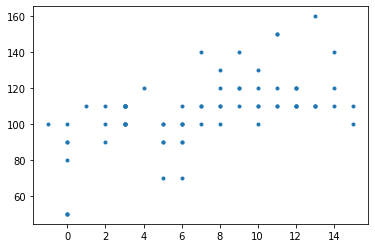

In [ ]:
plt.plot(cereal_data[["sugars"]], cereal_data[["calories"]], '.')

Text(0.5, 1.0, 'Sugars vs Calories')

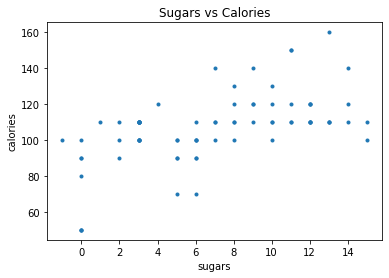

In [ ]:
x = cereal_data[["sugars"]] #same as step above but in an easier way to read 
y = cereal_data[["calories"]]

plt.plot(x,y,'.')
plt.xlabel("sugars")
plt.ylabel("calories")
plt.title("Sugars vs Calories")

Text(0.5, 1.0, 'Fat vs Calories')

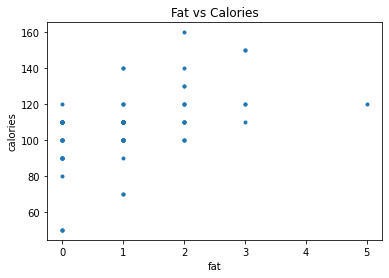

In [ ]:
x = cereal_data[["fat"]] 
y = cereal_data[["calories"]]

plt.plot(x,y,'.')
plt.xlabel("fat")
plt.ylabel("calories")
plt.title("Fat vs Calories")

Text(0.5, 1.0, 'Protein vs Carbohydrates')

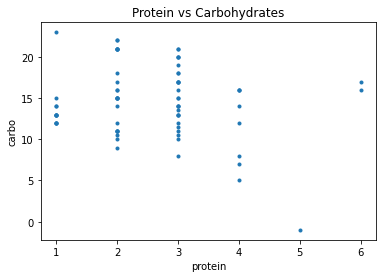

In [ ]:
x = cereal_data[["protein"]] 
y = cereal_data[["carbo"]]

plt.plot(x,y,'.')
plt.xlabel("protein")
plt.ylabel("carbo")
plt.title("Protein vs Carbohydrates")

In [ ]:
X = cereal_data[["protein"]]
Y = cereal_data[["carbo"]]

In [ ]:
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

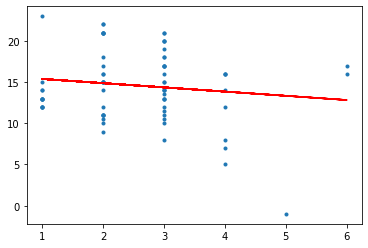

In [ ]:
plt.plot(X, Y,'.')
plt.plot(X, Y_pred, color='red')
plt.show()

In [ ]:
x = np.linspace(0,10,50)

In [ ]:
m = 3
b = 7

y = m * x + b

In [ ]:
noise = 10 * np.random.randn(50,) #noise is random numbers

In [ ]:
y=m*x+b+noise

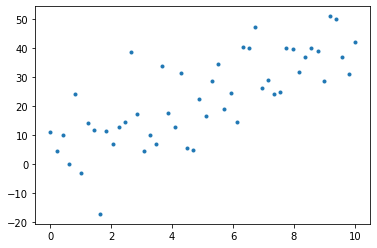

In [ ]:
plt.plot(x,y,'.')

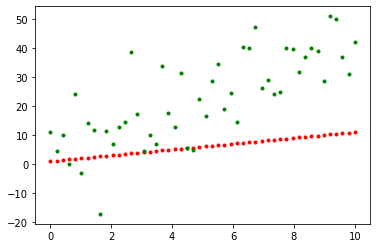

In [ ]:
m_guess = 1 #guessing ine of best fit 
b_guess = 1

y_guess = m_guess * x + b_guess

plt.plot(x,y_guess,'r.');
plt.plot(x,y,'g.');

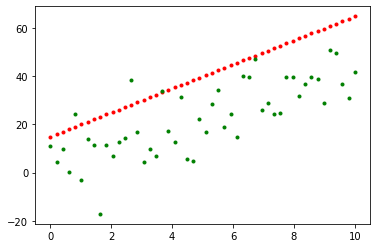

In [ ]:
m_guess = 5 #guessing line of best fit 
b_guess = 15

y_guess = m_guess * x + b_guess

plt.plot(x,y_guess,'r.');
plt.plot(x,y,'g.');

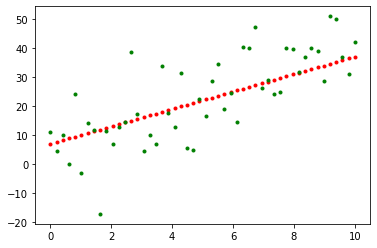

In [ ]:
m_guess = 3
b_guess = 7

y_guess = m_guess * x + b_guess

plt.plot(x,y_guess,'r.');
plt.plot(x,y,'g.');

In [ ]:
loss = np.sum((y_guess - y)**2) #this tells us how wrong we are with our guess

In [ ]:
loss

20056.48286618185

In [ ]:
for m_guess in np.linspace (-10,10,10):
  print(m_guess)

-10.0
-7.777777777777778
-5.555555555555555
-3.333333333333333
-1.1111111111111107
1.1111111111111107
3.333333333333334
5.555555555555557
7.777777777777779
10.0


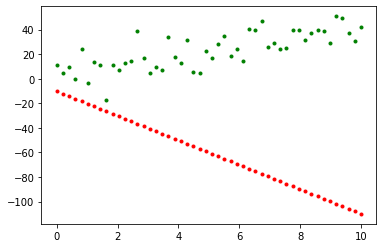

431425.6844391829 -10.0 -10.0


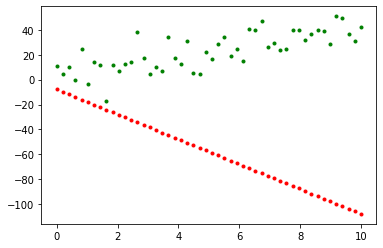

413263.65297327697 -10.0 -7.777777777777778


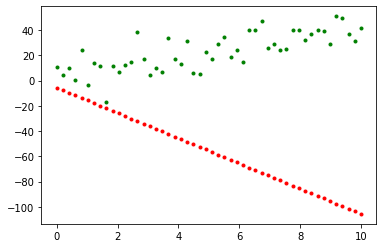

395595.4486678649 -10.0 -5.555555555555555


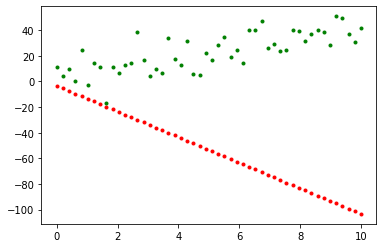

378421.07152294647 -10.0 -3.333333333333333


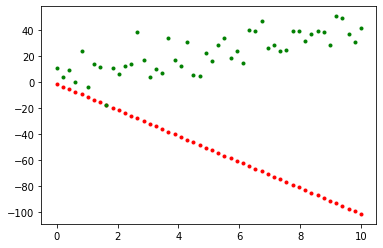

361740.52153852204 -10.0 -1.1111111111111107


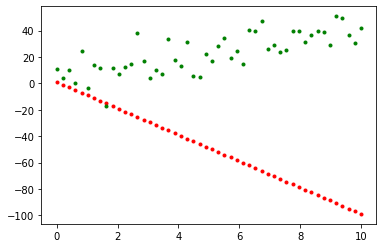

345553.7987145913 -10.0 1.1111111111111107


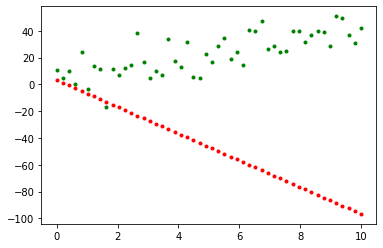

329860.9030511546 -10.0 3.333333333333334


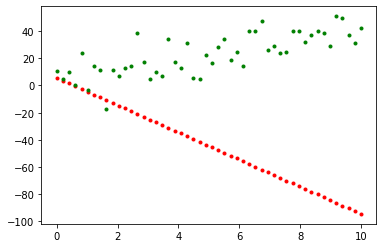

314661.83454821154 -10.0 5.555555555555557


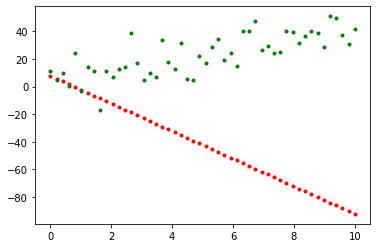

299956.5932057624 -10.0 7.777777777777779


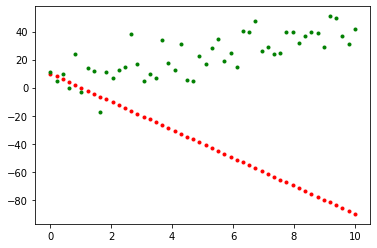

285745.179023807 -10.0 10.0


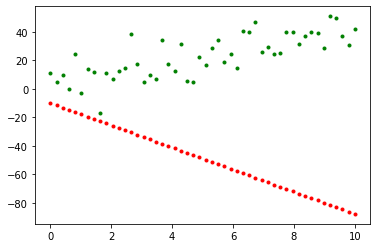

320948.2545967483 -7.777777777777778 -10.0


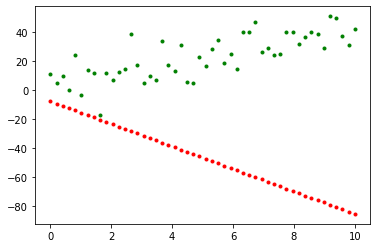

305255.3589333114 -7.777777777777778 -7.777777777777778


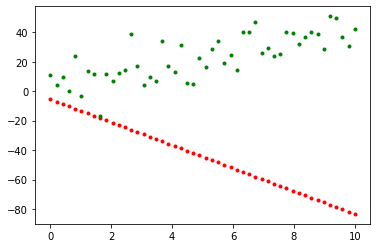

290056.2904303684 -7.777777777777778 -5.555555555555555


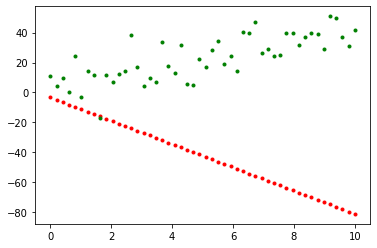

275351.04908791924 -7.777777777777778 -3.333333333333333


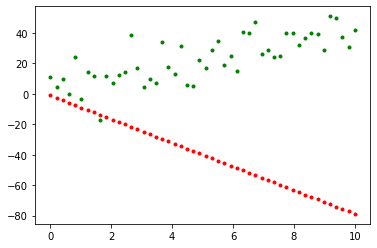

261139.6349059639 -7.777777777777778 -1.1111111111111107


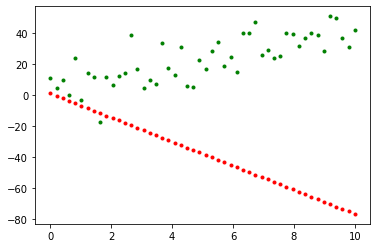

247422.04788450236 -7.777777777777778 1.1111111111111107


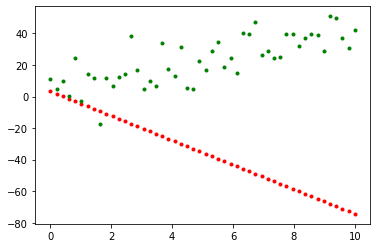

234198.28802353464 -7.777777777777778 3.333333333333334


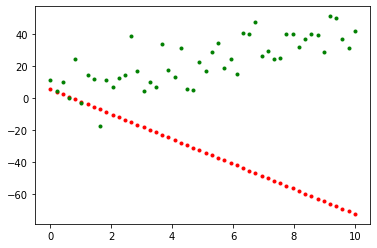

221468.35532306076 -7.777777777777778 5.555555555555557


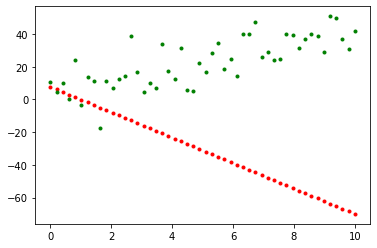

209232.2497830807 -7.777777777777778 7.777777777777779


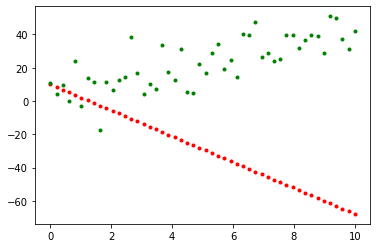

197489.97140359457 -7.777777777777778 10.0


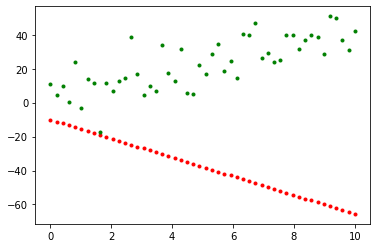

227099.69852604443 -5.555555555555555 -10.0


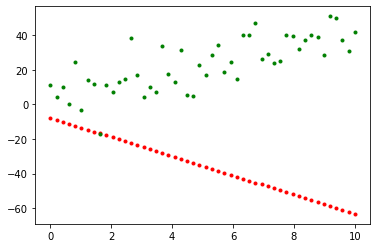

213875.9386650767 -5.555555555555555 -7.777777777777778


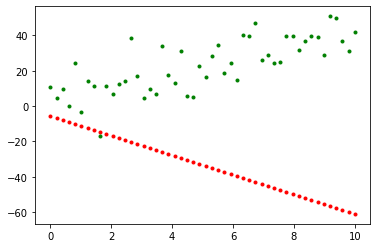

201146.00596460287 -5.555555555555555 -5.555555555555555


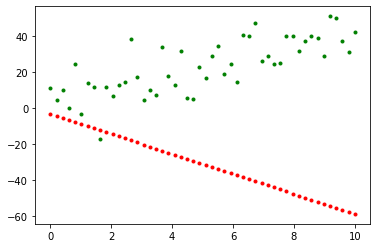

188909.90042462284 -5.555555555555555 -3.333333333333333


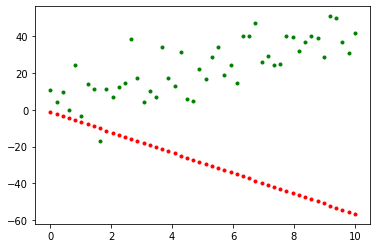

177167.62204513664 -5.555555555555555 -1.1111111111111107


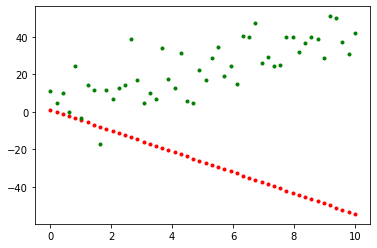

165919.17082614425 -5.555555555555555 1.1111111111111107


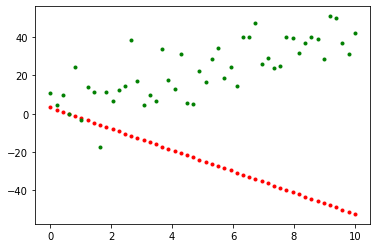

155164.54676764563 -5.555555555555555 3.333333333333334


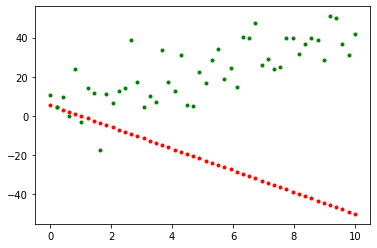

144903.74986964095 -5.555555555555555 5.555555555555557


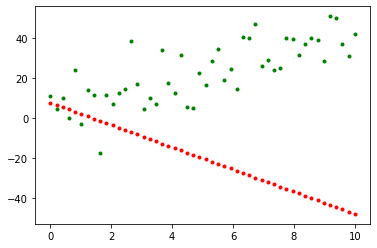

135136.78013213005 -5.555555555555555 7.777777777777779


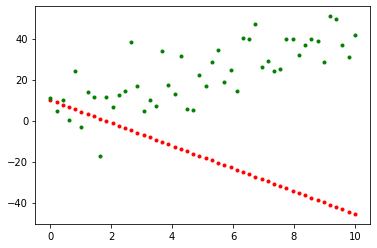

125863.63755511297 -5.555555555555555 10.0


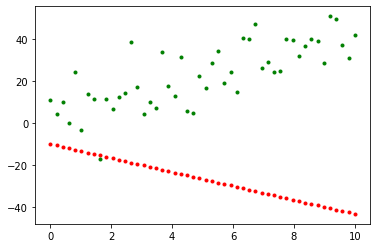

149880.01622707155 -3.333333333333333 -10.0


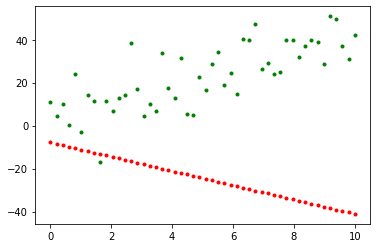

139125.39216857302 -3.333333333333333 -7.777777777777778


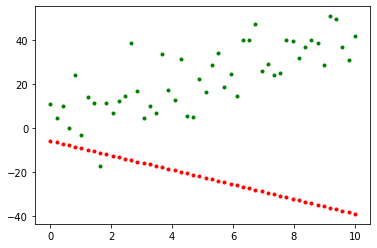

128864.59527056826 -3.333333333333333 -5.555555555555555


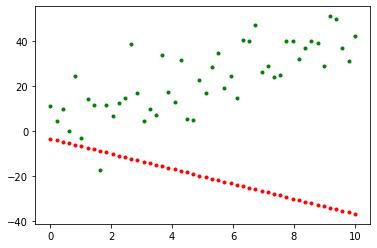

119097.62553305738 -3.333333333333333 -3.333333333333333


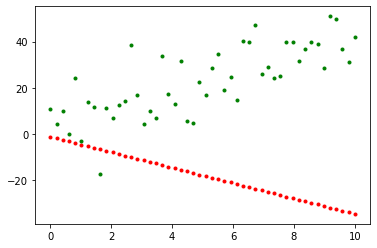

109824.48295604027 -3.333333333333333 -1.1111111111111107


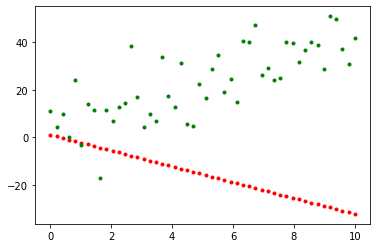

101045.16753951705 -3.333333333333333 1.1111111111111107


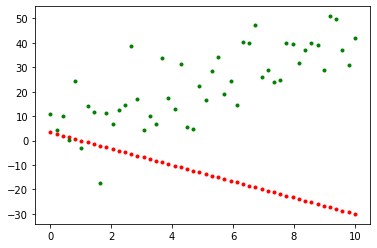

92759.67928348761 -3.333333333333333 3.333333333333334


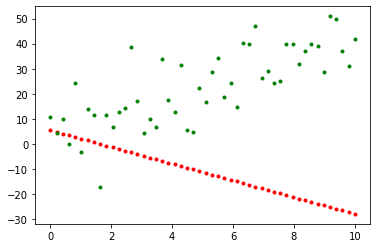

84968.01818795201 -3.333333333333333 5.555555555555557


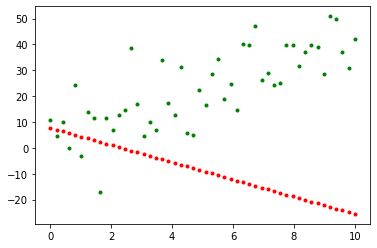

77670.18425291024 -3.333333333333333 7.777777777777779


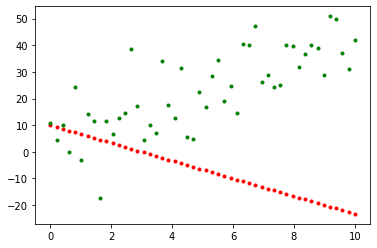

70866.17747836231 -3.333333333333333 10.0


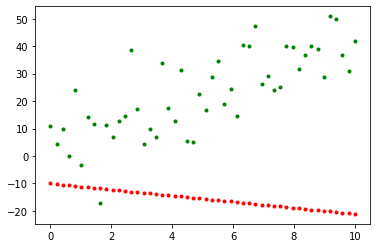

89289.20769982958 -1.1111111111111107 -10.0


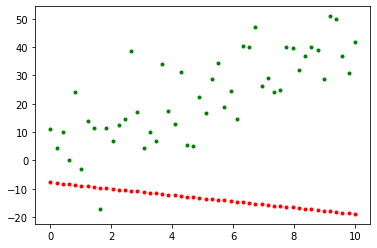

81003.71944380018 -1.1111111111111107 -7.777777777777778


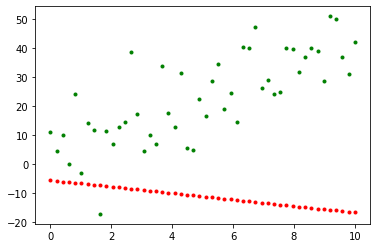

73212.05834826456 -1.1111111111111107 -5.555555555555555


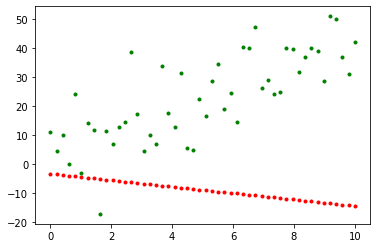

65914.22441322281 -1.1111111111111107 -3.333333333333333


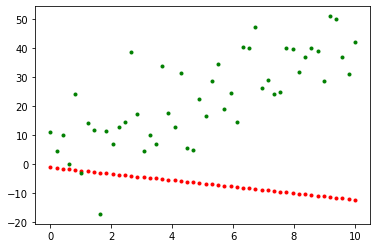

59110.21763867487 -1.1111111111111107 -1.1111111111111107


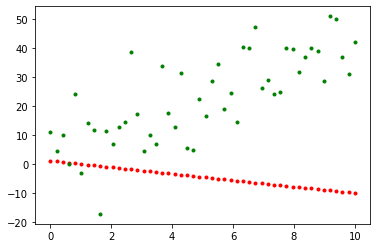

52800.03802462076 -1.1111111111111107 1.1111111111111107


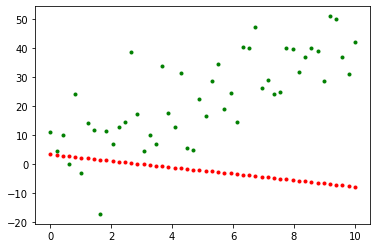

46983.685571060465 -1.1111111111111107 3.333333333333334


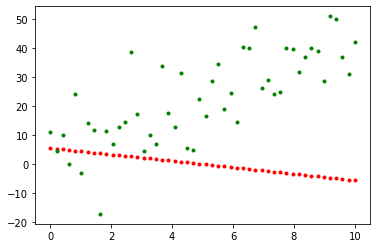

41661.16027799401 -1.1111111111111107 5.555555555555557


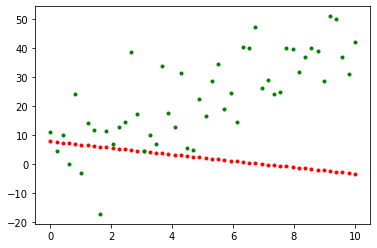

36832.46214542138 -1.1111111111111107 7.777777777777779


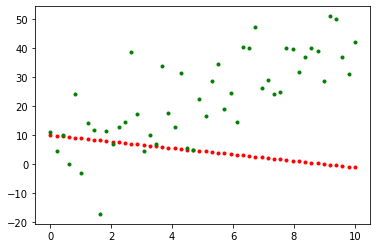

32497.591173342575 -1.1111111111111107 10.0


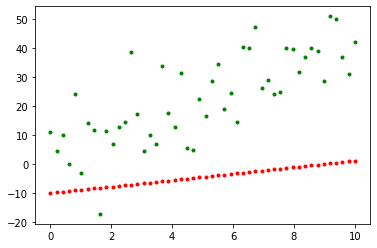

45327.27294431856 1.1111111111111107 -10.0


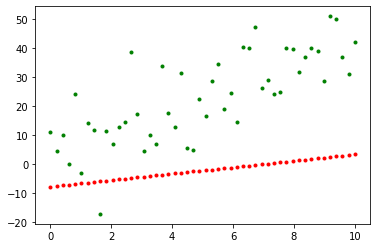

39510.92049075827 1.1111111111111107 -7.777777777777778


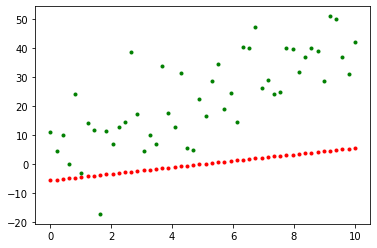

34188.3951976918 1.1111111111111107 -5.555555555555555


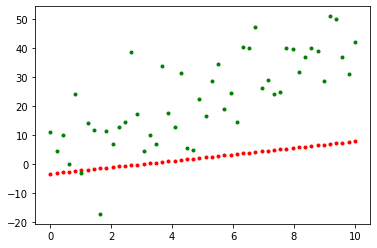

29359.697065119173 1.1111111111111107 -3.333333333333333


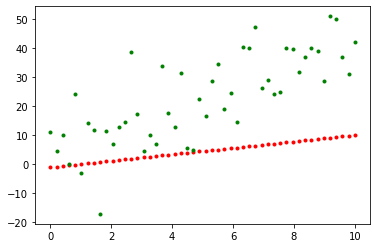

25024.826093040374 1.1111111111111107 -1.1111111111111107


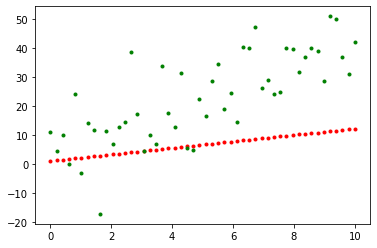

21183.782281455395 1.1111111111111107 1.1111111111111107


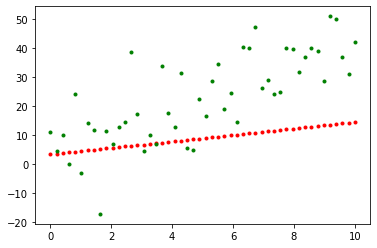

17836.565630364243 1.1111111111111107 3.333333333333334


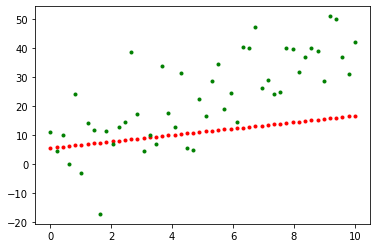

14983.17613976692 1.1111111111111107 5.555555555555557


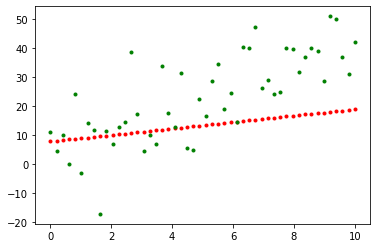

12623.613809663426 1.1111111111111107 7.777777777777779


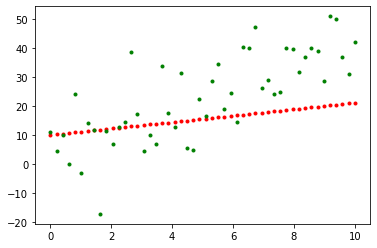

10757.878640053756 1.1111111111111107 10.0


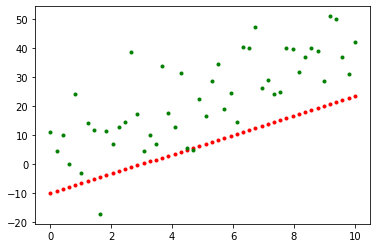

17994.211960538414 3.333333333333334 -10.0


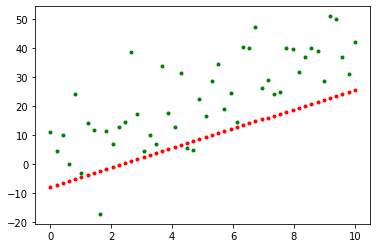

14646.995309447264 3.333333333333334 -7.777777777777778


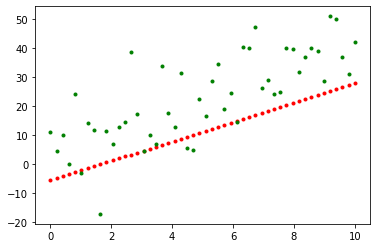

11793.605818849943 3.333333333333334 -5.555555555555555


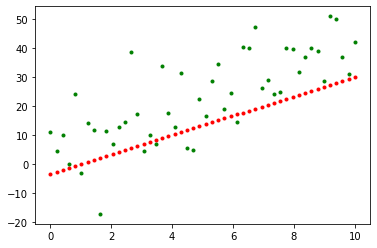

9434.043488746443 3.333333333333334 -3.333333333333333


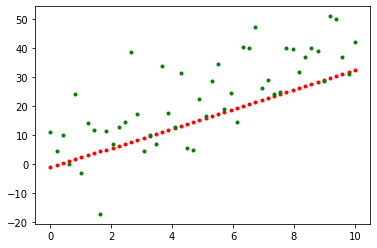

7568.308319136779 3.333333333333334 -1.1111111111111107


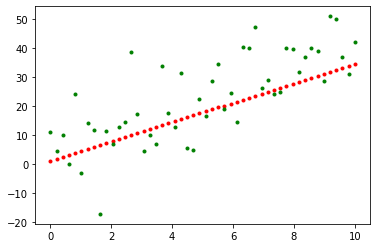

6196.400310020938 3.333333333333334 1.1111111111111107


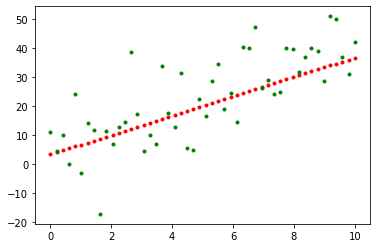

5318.3194613989235 3.333333333333334 3.333333333333334


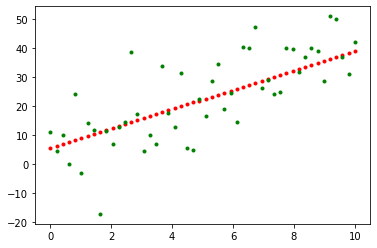

4934.065773270738 3.333333333333334 5.555555555555557


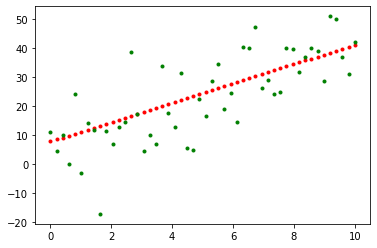

5043.639245636379 3.333333333333334 7.777777777777779


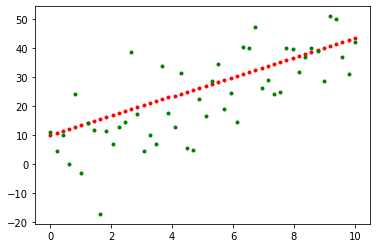

5647.039878495845 3.333333333333334 10.0


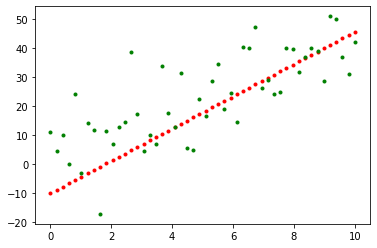

7290.024748489201 5.555555555555557 -10.0


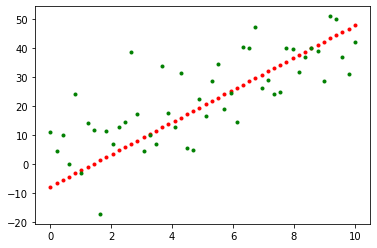

6411.9438998671885 5.555555555555557 -7.777777777777778


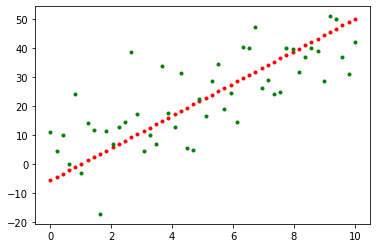

6027.690211739003 5.555555555555557 -5.555555555555555


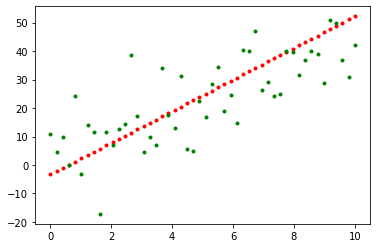

6137.263684104644 5.555555555555557 -3.333333333333333


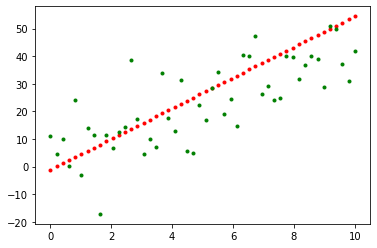

6740.664316964113 5.555555555555557 -1.1111111111111107


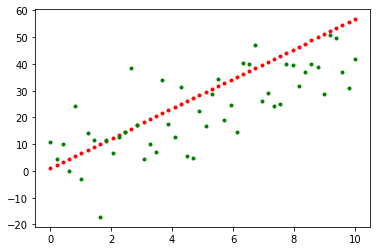

7837.89211031741 5.555555555555557 1.1111111111111107


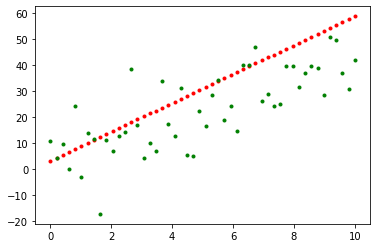

9428.947064164537 5.555555555555557 3.333333333333334


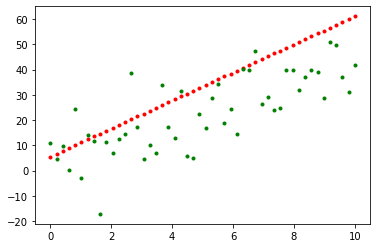

11513.829178505484 5.555555555555557 5.555555555555557


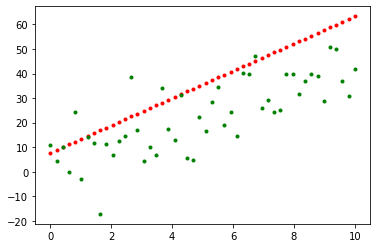

14092.538453340263 5.555555555555557 7.777777777777779


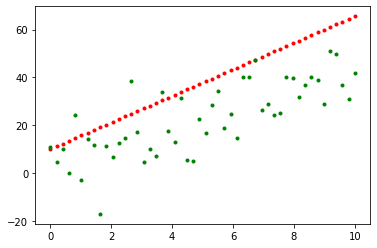

17165.074888668867 5.555555555555557 10.0


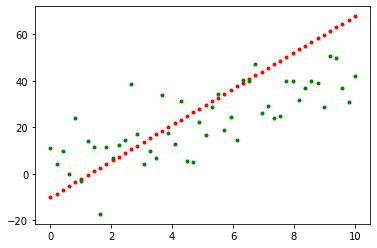

13214.711308170907 7.777777777777779 -10.0


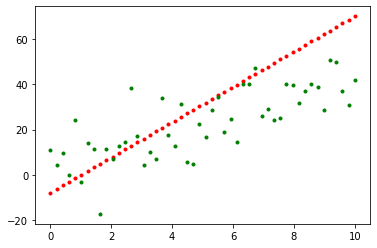

14805.76626201803 7.777777777777779 -7.777777777777778


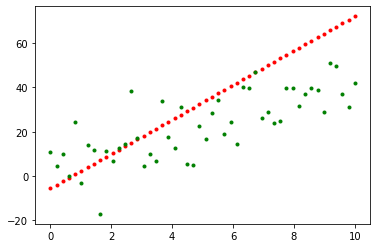

16890.64837635898 7.777777777777779 -5.555555555555555


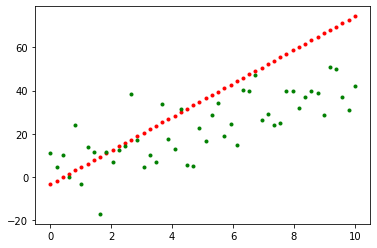

19469.357651193754 7.777777777777779 -3.333333333333333


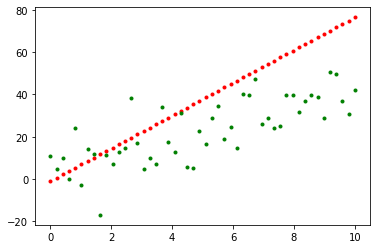

22541.894086522363 7.777777777777779 -1.1111111111111107


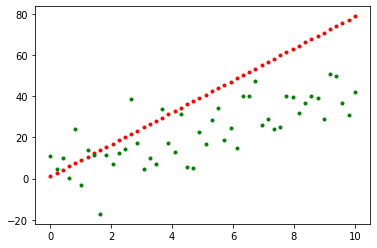

26108.257682344793 7.777777777777779 1.1111111111111107


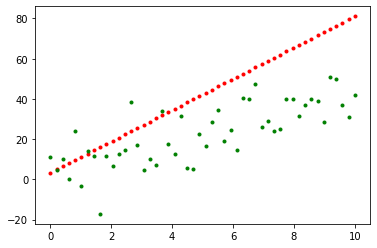

30168.448438661053 7.777777777777779 3.333333333333334


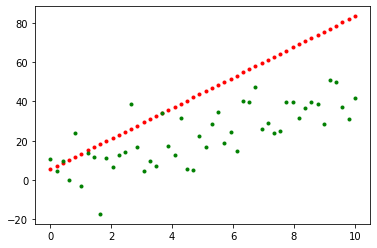

34722.466355471144 7.777777777777779 5.555555555555557


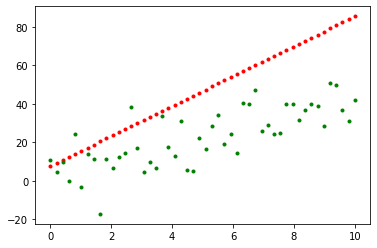

39770.31143277505 7.777777777777779 7.777777777777779


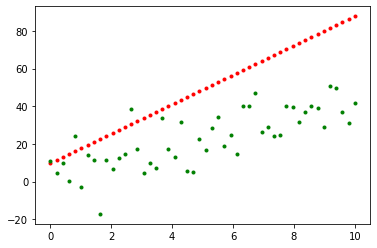

45311.98367057279 7.777777777777779 10.0


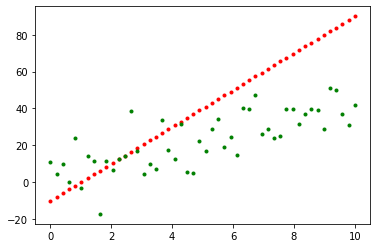

35768.271639583516 10.0 -10.0


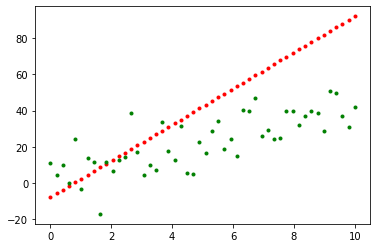

39828.46239589978 10.0 -7.777777777777778


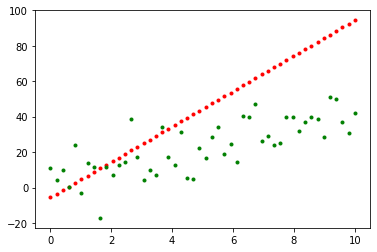

44382.48031270985 10.0 -5.555555555555555


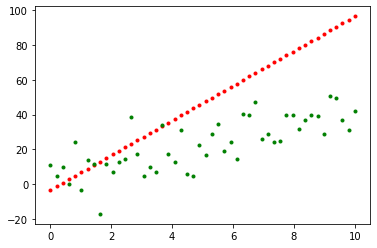

49430.32539001378 10.0 -3.333333333333333


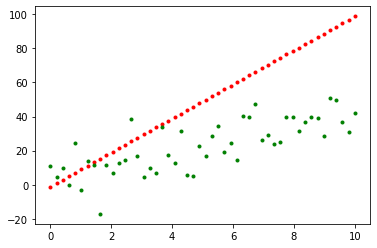

54971.99762781151 10.0 -1.1111111111111107


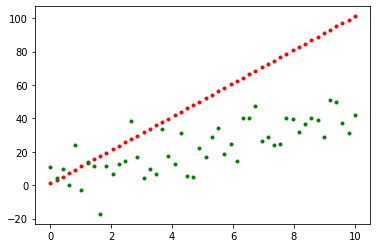

61007.49702610309 10.0 1.1111111111111107


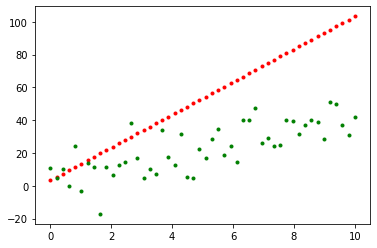

67536.82358488847 10.0 3.333333333333334


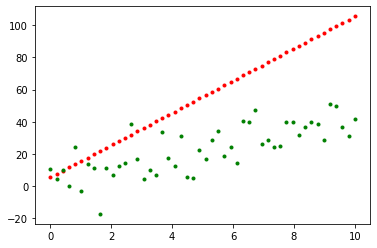

74559.9773041677 10.0 5.555555555555557


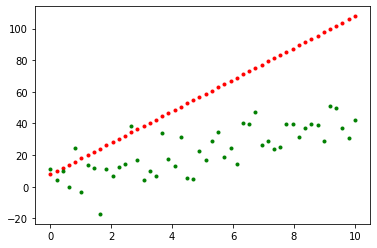

82076.95818394075 10.0 7.777777777777779


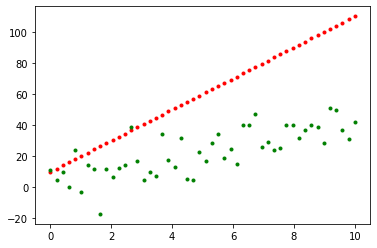

90087.7662242076 10.0 10.0


In [ ]:
for m_guess in np.linspace(-10,10,10): #double loop
    for b_guess in np.linspace(-10,10,10):
        
        y_guess = m_guess * x + b_guess

        plt.plot(x,y_guess,'r.');
        plt.plot(x,y,'g.');
        plt.show()

        loss = np.sum((y_guess - y)**2)

        print(loss,m_guess,b_guess)

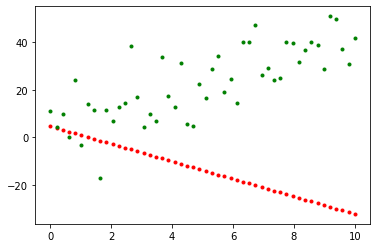

96282.82642106026 -3.6842105263157894 4.7368421052631575


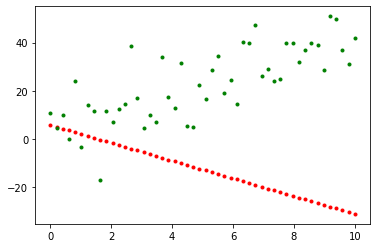

92493.54774268866 -3.6842105263157894 5.789473684210526


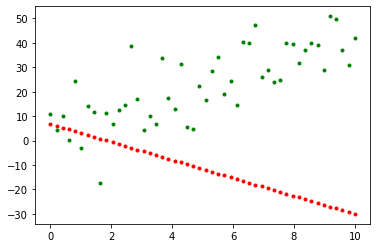

88815.0723884168 -3.6842105263157894 6.842105263157894


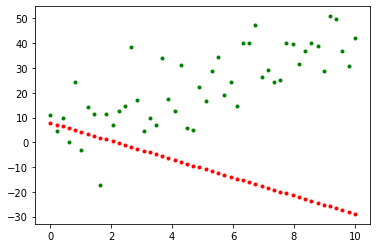

85247.40035824466 -3.6842105263157894 7.894736842105264


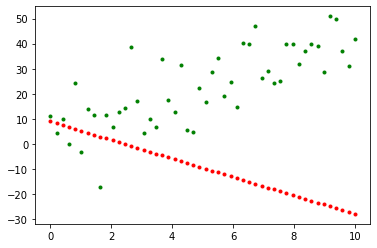

81790.53165217227 -3.6842105263157894 8.94736842105263


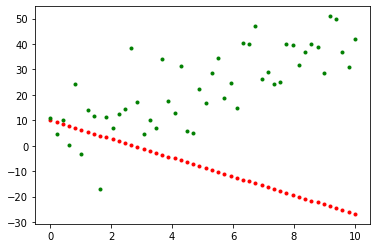

78444.46627019957 -3.6842105263157894 10.0


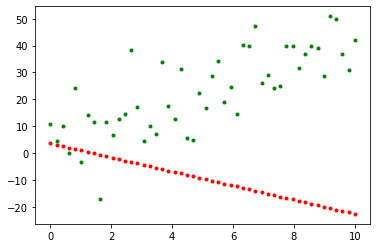

75367.65310573933 -2.6315789473684212 3.6842105263157894


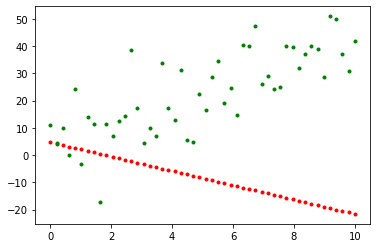

72021.58772376663 -2.6315789473684212 4.7368421052631575


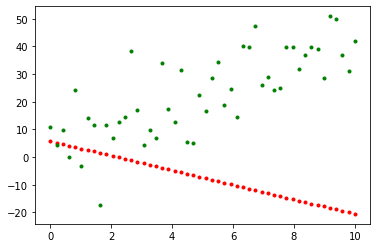

68786.32566589366 -2.6315789473684212 5.789473684210526


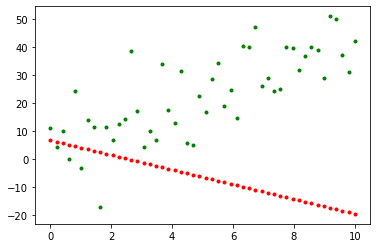

65661.8669321204 -2.6315789473684212 6.842105263157894


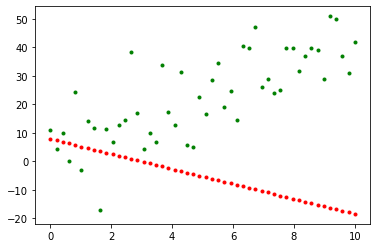

62648.21152244688 -2.6315789473684212 7.894736842105264


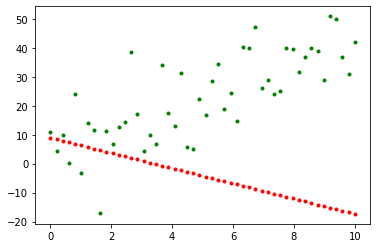

59745.35943687309 -2.6315789473684212 8.94736842105263


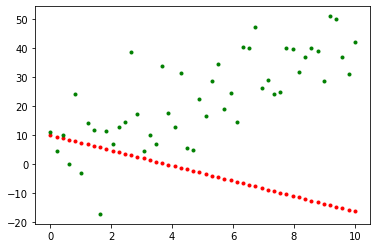

56953.31067539901 -2.6315789473684212 10.0


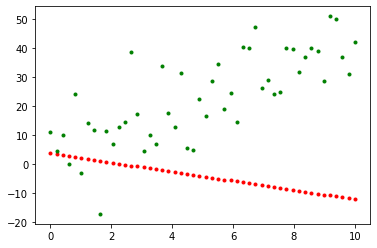

54283.5301300806 -1.578947368421053 3.6842105263157894


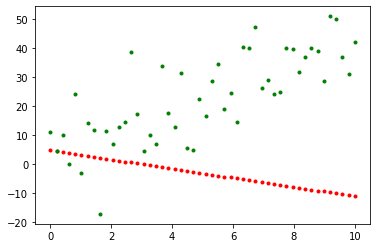

51491.48136860653 -1.578947368421053 4.7368421052631575


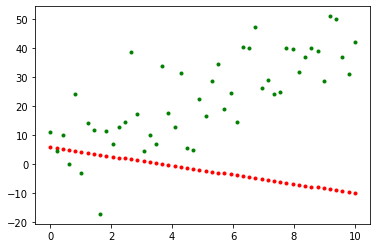

48810.23593123218 -1.578947368421053 5.789473684210526


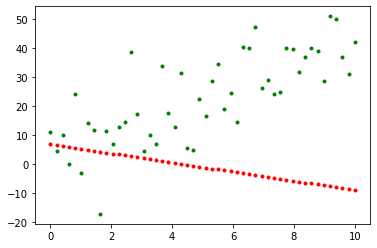

46239.79381795754 -1.578947368421053 6.842105263157894


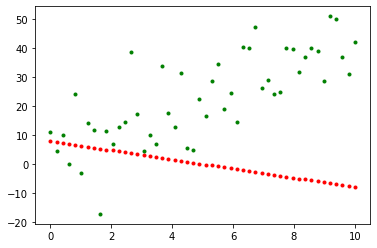

43780.155028782625 -1.578947368421053 7.894736842105264


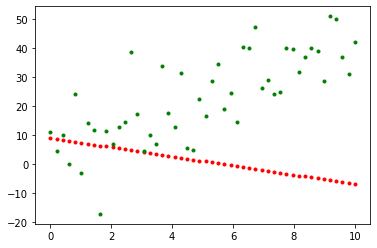

41431.31956370746 -1.578947368421053 8.94736842105263


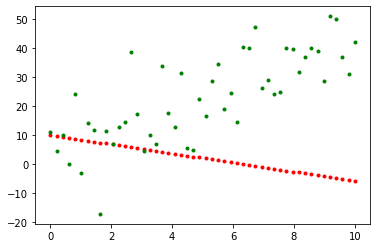

39193.287422731984 -1.578947368421053 10.0


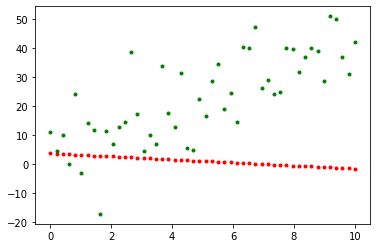

36930.53949655542 -0.526315789473685 3.6842105263157894


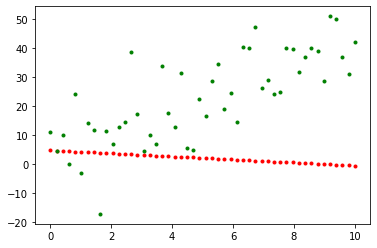

34692.50735557996 -0.526315789473685 4.7368421052631575


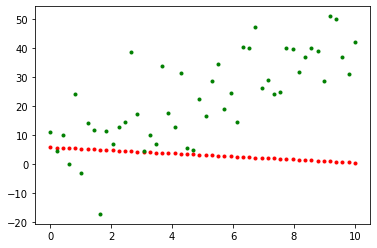

32565.27853870422 -0.526315789473685 5.789473684210526


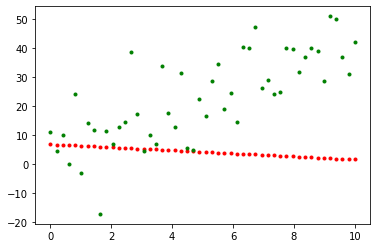

30548.8530459282 -0.526315789473685 6.842105263157894


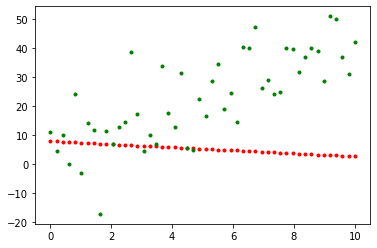

28643.230877251903 -0.526315789473685 7.894736842105264


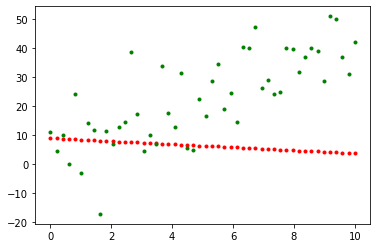

26848.41203267534 -0.526315789473685 8.94736842105263


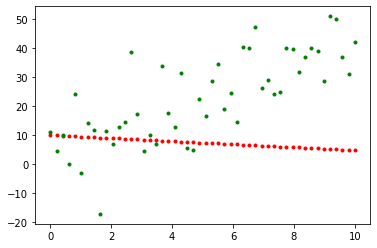

25164.396512198487 -0.526315789473685 10.0


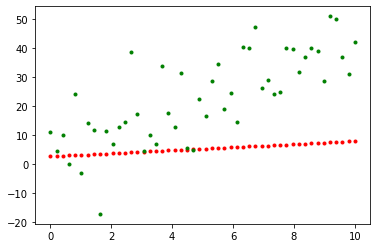

25103.500049740338 0.5263157894736832 2.6315789473684212


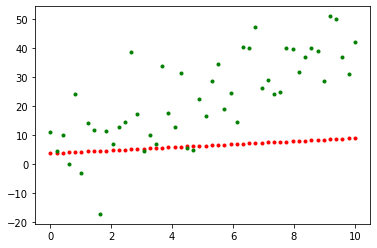

23308.681205163764 0.5263157894736832 3.6842105263157894


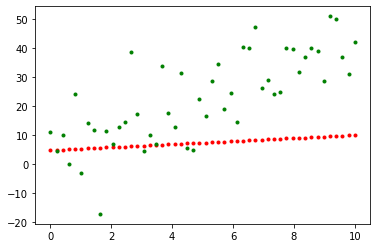

21624.665684686915 0.5263157894736832 4.7368421052631575


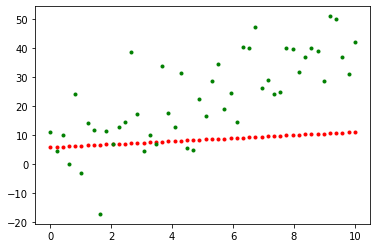

20051.45348830979 0.5263157894736832 5.789473684210526


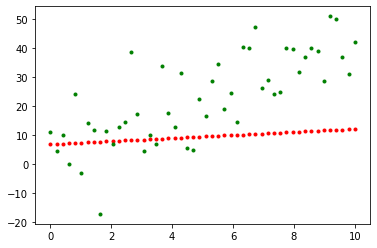

18589.044616032388 0.5263157894736832 6.842105263157894


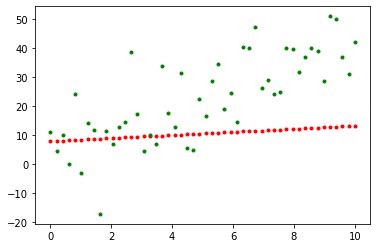

17237.439067854706 0.5263157894736832 7.894736842105264


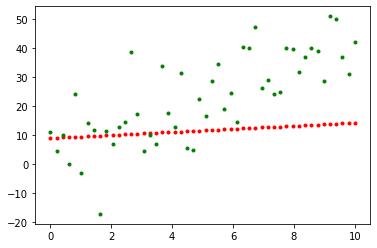

15996.636843776752 0.5263157894736832 8.94736842105263


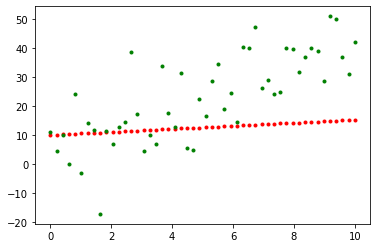

14866.637943798516 0.5263157894736832 10.0


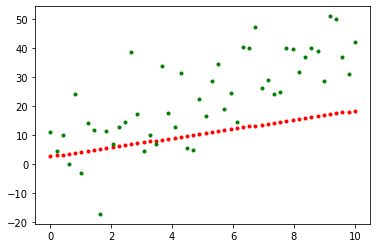

14658.75747998359 1.5789473684210513 2.6315789473684212


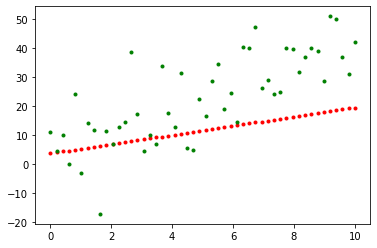

13417.955255905636 1.5789473684210513 3.6842105263157894


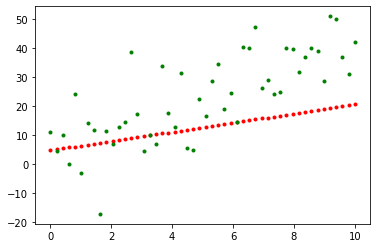

12287.9563559274 1.5789473684210513 4.7368421052631575


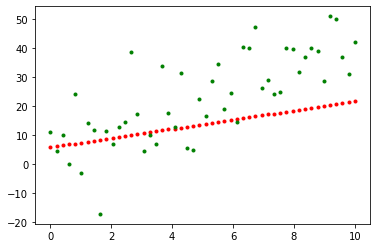

11268.76078004889 1.5789473684210513 5.789473684210526


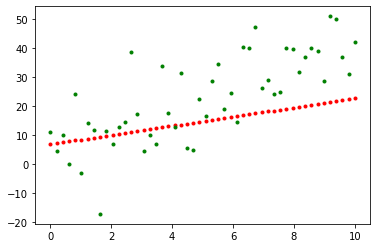

10360.368528270099 1.5789473684210513 6.842105263157894


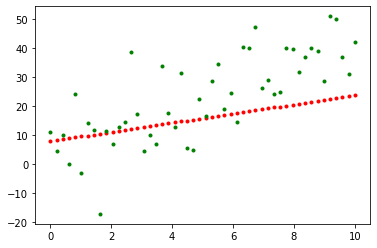

9562.779600591035 1.5789473684210513 7.894736842105264


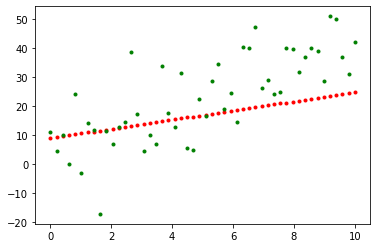

8875.993997011694 1.5789473684210513 8.94736842105263


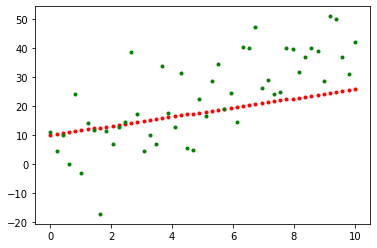

8300.011717532074 1.5789473684210513 10.0


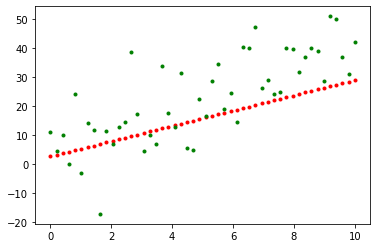

7945.147252360363 2.6315789473684212 2.6315789473684212


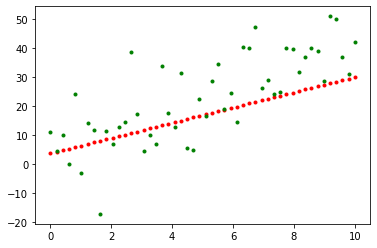

7258.361648781023 2.6315789473684212 3.6842105263157894


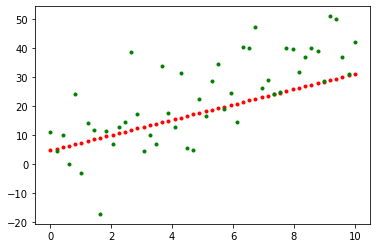

6682.379369301405 2.6315789473684212 4.7368421052631575


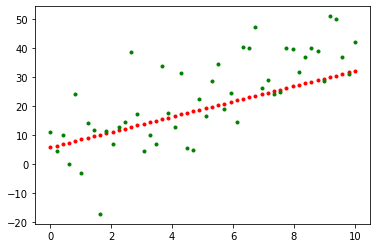

6217.200413921509 2.6315789473684212 5.789473684210526


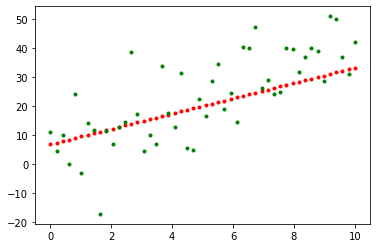

5862.824782641338 2.6315789473684212 6.842105263157894


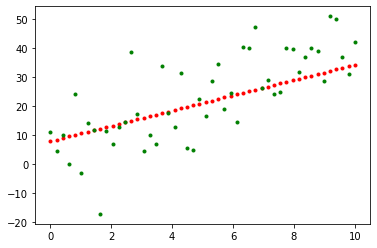

5619.252475460888 2.6315789473684212 7.894736842105264


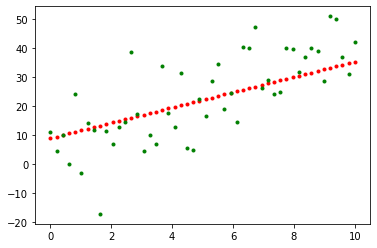

5486.483492380161 2.6315789473684212 8.94736842105263


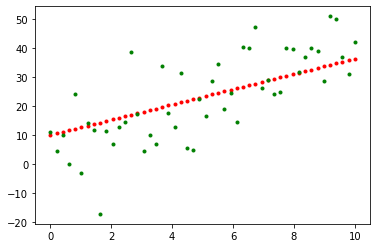

5464.517833399158 2.6315789473684212 10.0


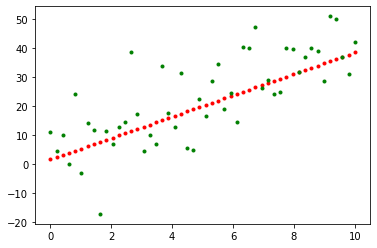

5206.241674051129 3.6842105263157894 1.5789473684210513


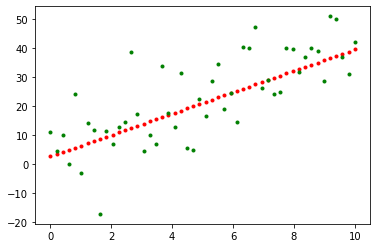

4962.6693668706785 3.6842105263157894 2.6315789473684212


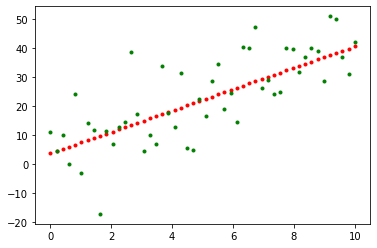

4829.900383789953 3.6842105263157894 3.6842105263157894


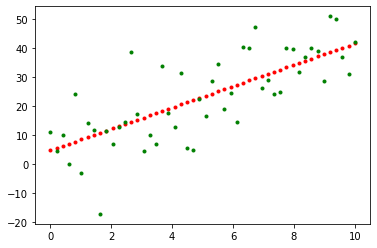

4807.934724808949 3.6842105263157894 4.7368421052631575


In [ ]:
best_loss = 100000
best_m = 0
best_b = 0 

for m_guess in np.linspace(-10,10,20):
    for b_guess in np.linspace(-10,10,20):
        
        y_guess = m_guess * x + b_guess

        loss = np.sum((y_guess - y)**2)

        if loss < best_loss:
            
            best_loss = loss
            best_m = m_guess
            best_b = b_guess 

            plt.plot(x,y_guess,'r.');
            plt.plot(x,y,'g.');
            plt.show()

            print(loss,m_guess,b_guess)